In [1]:
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
def disvarmin(lats, longs):
    parallels = np.arange(35.,47.,0.1)
    meridians = np.arange(5.,20.,0.1)

    disvar = 1e15
    latMin = np.array([])
    longMin = np.array([])
    var = np.array([])

    for pars in parallels:
        for mers in meridians:
            sd = np.max(np.sqrt((lats - pars)**2 + (longs - mers)**2)) - np.min(np.sqrt((lats - pars)**2 + (longs - mers)**2))
            #if sd<disvar:
            var = np.append(var, sd)
            latMin = np.append(latMin, pars)
            longMin = np.append(longMin, mers)

    idm = np.argmin(var)
    longMin = longMin[np.argmin(var)]
    latMin = latMin[np.argmin(var)]

    return(longMin, latMin)

In [3]:
geolocator = Nominatim(user_agent="usrapp")

locDic = {'City': ['Leonessa, PZ', 'Portopalo, SR', 'Messina, ME, IT', 'Barletta, BAT', 'Ischia, NA', 'San Fele, PZ', 'Caltavuturo, PA', 'Siracusa, SR', 'Santeramo in Colle, BA', 'Augusta, SR', 'Sava, TA', 'Torino, TO', 'Avigliano, PZ']}
latitude = []
longitude = []

df = pd.DataFrame(locDic)

In [4]:
for city in df["City"]:
    loc = geolocator.geocode(city)
    if loc is not None:
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)  


In [5]:
df["Latitude"] = latitude
df["Longitude"] = longitude

df

,City,Latitude,Longitude
0,"Leonessa, PZ",41.062081,15.595451
1,"Portopalo, SR",36.680089,15.131874
2,"Messina, ME, IT",38.193757,15.554208
3,"Barletta, BAT",41.321498,16.286870
4,"Ischia, NA",40.734205,13.947125
5,"San Fele, PZ",40.819325,15.538428
6,"Caltavuturo, PA",37.821067,13.890224
7,"Siracusa, SR",37.064614,15.290720
8,"Santeramo in Colle, BA",40.793027,16.755286
9,"Augusta, SR",37.236936,15.219658


In [6]:
midPt = [df["Latitude"].mean(), df["Longitude"].mean()]
#print(midPt)
#location = geolocator.reverse(midPt)
#print(location)

[39.84057665, 14.936231093509617]


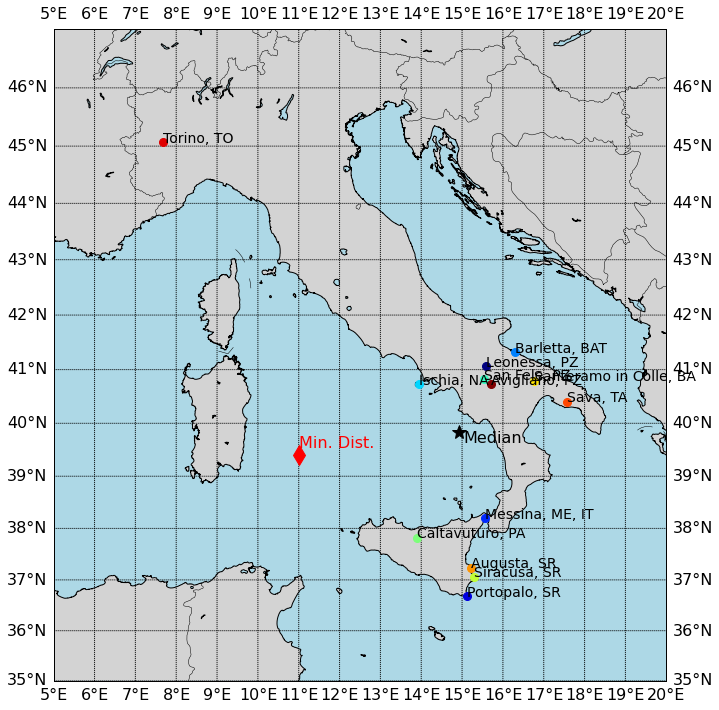

In [10]:
fig,ax = plt.subplots(figsize=(8*1.5,8*1.5))
#plt.figure(figsize=(8*1.5,8*1.5))

m = Basemap(resolution='h', projection='merc', llcrnrlat=35, urcrnrlat=47, llcrnrlon=5, urcrnrlon=20)

m.drawcoastlines()
parallels = np.arange(35.,47.,1)
meridians = np.arange(5.,20.01,1)
m.fillcontinents (color='lightgray', lake_color='lightblue')
#parallels = np.arange(35.,45.,1)
m.drawparallels(parallels, labels=[True, True, False, False])
#meridians = np.arange(10.,20.01,1)
m.drawmeridians(meridians, labels=[False, False, True, True])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries()
m.drawstates()

# m.drawcounties()
# x, y = m(*zip(*[hawaii, austin, washington, chicago, losangeles]))

lats = df['Latitude'].to_numpy()
longs = df['Longitude'].to_numpy()
longM, latM = m(longs, lats)


longMinVar, latMinVar = disvarmin(lats, longs)
xx, yy = m(longMinVar, latMinVar)
plt.plot(xx, yy, marker='d', markersize=14, color='r')
plt.text(xx, yy+2e4, 'Min. Dist.', color='r')

colors = cm.jet(np.linspace(0, 1, len(longM)))
labels = df['City'].to_numpy()

x,y = m(midPt[1], midPt[0])
plt.plot(x, y, 'rx', marker='*', markersize=14, color='k')
plt.text(x+1e4, y-3e4, 'Median')

for xpt, ypt, c, label in zip(longM, latM, colors, labels):
    plt.plot(xpt, ypt, marker='o', markersize=8, color=c)
    #circ = plt.Circle((xpt, ypt), np.sqrt((xpt - x)**2 + (ypt - y)**2), color=c, fill=False, lw=1.5)
    #ax.add_patch(circ)
    plt.text(xpt+00000, ypt-00000, label, fontsize=14)
       
#for xpt, ypt, c, label in zip(longM, latM, colors, labels):
        #circ2 = plt.Circle((xpt, ypt), np.sqrt((xpt - xx)**2 + (ypt - yy)**2), color=c, fill=False, lw=1.5, ls='--')
        #ax.add_patch(circ2)

#plt.plot(midLatM, midLongM, marker='*', markersize=14, color='k')
#plt.plot(longMinVarM, latMinVarM, marker='*', markersize=14, color='r')
#plt.text(midLongM+1e4, midLatM-7e4, 'Median')
#plt.text(latMinVarM+1e4, latMinVarM, 'Min. Dist.')
#plt.title('Mercator Projection')
saveFig = True
if saveFig:
    plt.savefig('mappa', bbox_inches='tight')
plt.show()
plt.rcParams.update({'font.size': 16})


